In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('tweets.csv',nrows=500)

In [64]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [65]:
df.columns

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

In [ ]:
# performing Exploratory Data Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

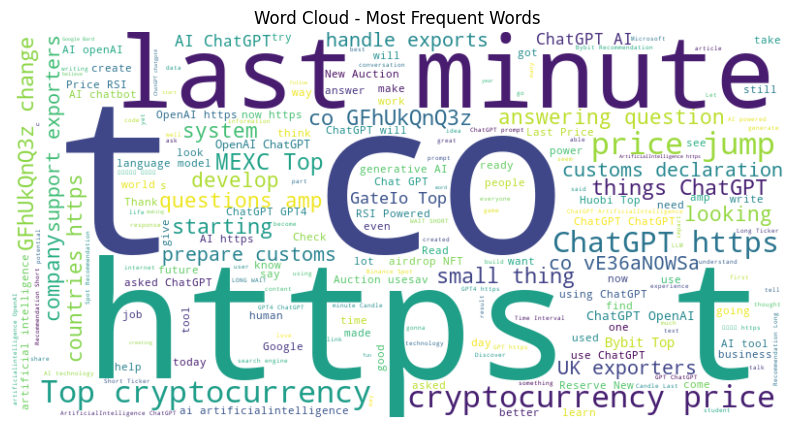

In [127]:
filtered_text = df['text'].dropna().astype(str)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

/var/folders/fp/z4_9dnh14nq03ck7022x8bhr0000gn/T/ipykernel_1090/2162786243.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


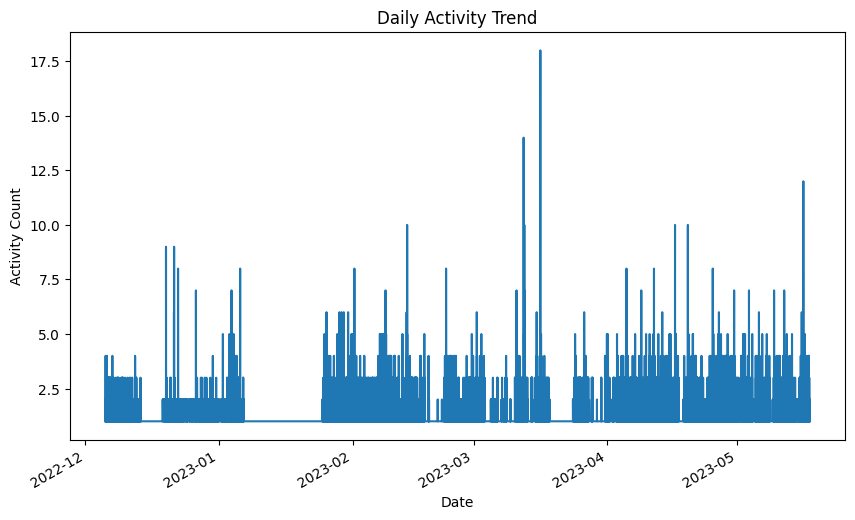

In [128]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
daily_activity = df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
daily_activity.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.title('Daily Activity Trend')
plt.show()

/var/folders/fp/z4_9dnh14nq03ck7022x8bhr0000gn/T/ipykernel_1090/4251326507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].fillna('').apply(len)


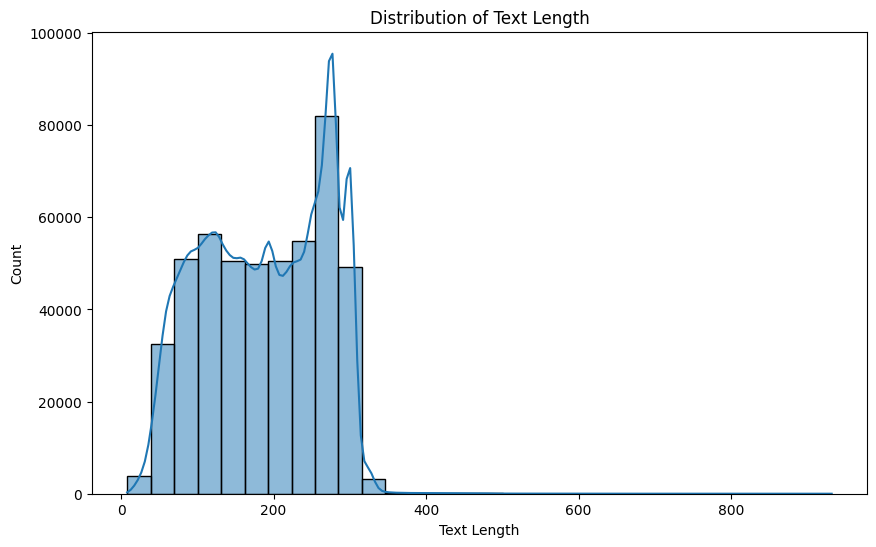

In [129]:
df['text_length'] = df['text'].fillna('').apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=30, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Length')
plt.show()

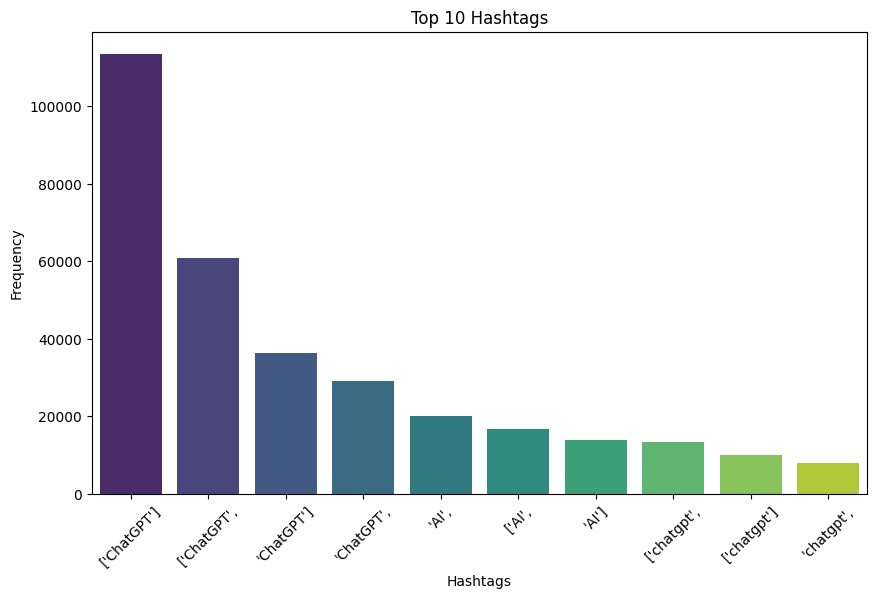

In [110]:
top_hashtags = df['hashtags'].str.split().explode().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.show()

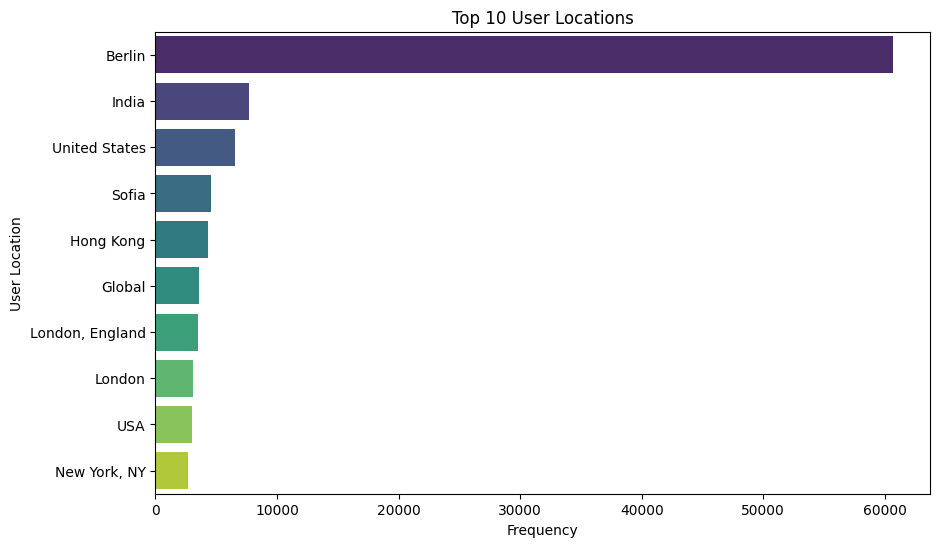

In [112]:
top_user_locations = df['user_location'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_user_locations.values, y=top_user_locations.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('User Location')
plt.title('Top 10 User Locations')
plt.show()

In [66]:
# remove duplicate rows 
import pandas as pd

def remove_duplicates(csv_file):
    df = pd.read_csv(csv_file,nrows=500)
    texts = df['text'].tolist()
    unique_texts = list(set(texts))

    return unique_texts

In [67]:
unique_texts = remove_duplicates('tweets.csv')

In [6]:
unique_texts

['People are fearing for their jobs after recent ChatGPT updates - Video Gamer #chatgpt #AI #openAI https://t.co/kdW17HrWli',
 'Have you tried ChatGPT yet? Watch my #ChatGPT video from the fantastic @TeamAPCIA HR Conference and envision how #AI can save time for other higher level work. Thanks APCIA for the opportunity to talk about #recruitment! #insurancecareersmovement https://t.co/9w3iJiv7rv',
 '#gm This is the 1st #Bitcoin\u202f\u202f\u202f #forecast #video from Sunny, a #ChatGPT-powered #AI #vtuber\nShe learned past data with #ChatGPT and RNN.\nShe helps #investors analyze #crypto markets and find data-driven opportunities to reduce #investment risk.\nI always followback #HODL #WAGMI https://t.co/9Q826gjwC6',
 'Unbelievable! Why chatGPT can know the latest shopping app TEMU？\n#ChatGPT https://t.co/aebzBVIJjr',
 "@crypto__mak Introducing the #Utopia #ChatGPT. An #AI assistance inside Utopia's private messenger. It's free and available on Windows, Linux, macOS and mobile Android. D

In [68]:

import pandas as pd

def remove_missing_values(csv_file, unique_texts):
    df = pd.read_csv(csv_file)
    df_filtered = df[df['text'].isin(unique_texts)]
    df_filtered = df_filtered.dropna()

    return df_filtered

In [69]:
filtered_df = remove_missing_values('tweets.csv', unique_texts)

/var/folders/fp/z4_9dnh14nq03ck7022x8bhr0000gn/T/ipykernel_1375/3282600464.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [9]:
filtered_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
2536162,RACHELLE DENÉ POTH |ThriveinEDU #ARVR #AI #AIi...,How much has changed since I wrote this last y...,Pittsburgh,💥ISTE Certified Educator |Teacher| Consultant|...,2009-06-23 02:45:55+00:00,33979.0,9355.0,260248,False,2023-04-19 17:35:10+00:00,['NLP'],Hootsuite Inc.
2550991,Marji J. Sherman,Learn how to use #ChatGPT for #DigitalMarketin...,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,164936.0,112747.0,20215,False,2023-04-14 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2566146,Marji J. Sherman,Learn how to use #ChatGPT for #DigitalMarketin...,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165006.0,112785.0,20212,False,2023-04-11 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2632348,Marji J. Sherman,Learn how to use #ChatGPT for #DigitalMarketin...,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165039.0,112804.0,20213,False,2023-04-08 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool


In [15]:
filtered_df['text']

2          ChatGPT Thinks These 5 Crypto Coins Will Explo...
3          New: @JWVance's post about 5 #startups (includ...
4          🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
6          Video : Show a company's logo based on the web...
7          I just used my #CerberusGPT HologeneticsLab an...
                                 ...                        
2536162    How much has changed since I wrote this last y...
2550991    Learn how to use #ChatGPT for #DigitalMarketin...
2566146    Learn how to use #ChatGPT for #DigitalMarketin...
2632348    Learn how to use #ChatGPT for #DigitalMarketin...
2643982    Learn how to use #ChatGPT for #DigitalMarketin...
Name: text, Length: 298, dtype: object

In [70]:
# normalize the data
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def normalize_text(df):
    df['text'] = df['text'].str.lower()
    df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

    return df

In [71]:
normalized_df = normalize_text(filtered_df)

In [18]:
normalized_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt thinks 5 crypto coins explode year yah...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new jwvances post 5 startups including vcinity...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get binance spot recommendation short ticker g...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show companys logo based website domain ...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,used cerberusgpt hologeneticslab simulated hol...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
2536162,RACHELLE DENÉ POTH |ThriveinEDU #ARVR #AI #AIi...,much changed since wrote last year robowriters...,Pittsburgh,💥ISTE Certified Educator |Teacher| Consultant|...,2009-06-23 02:45:55+00:00,33979.0,9355.0,260248,False,2023-04-19 17:35:10+00:00,['NLP'],Hootsuite Inc.
2550991,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,164936.0,112747.0,20215,False,2023-04-14 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2566146,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165006.0,112785.0,20212,False,2023-04-11 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2632348,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165039.0,112804.0,20213,False,2023-04-08 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool


In [19]:
normalized_df['text']

2          chatgpt thinks 5 crypto coins explode year yah...
3          new jwvances post 5 startups including vcinity...
4          get binance spot recommendation short ticker g...
6          video show companys logo based website domain ...
7          used cerberusgpt hologeneticslab simulated hol...
                                 ...                        
2536162    much changed since wrote last year robowriters...
2550991    learn use chatgpt digitalmarketing emailmarketing
2566146    learn use chatgpt digitalmarketing emailmarketing
2632348    learn use chatgpt digitalmarketing emailmarketing
2643982    learn use chatgpt digitalmarketing emailmarketing
Name: text, Length: 298, dtype: object

In [72]:
# clean the text
import pandas as pd
import re
import string

def clean_text(df):
    df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
    df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df['text'] = df['text'].apply(lambda x: re.sub(' +', ' ', x.strip()))

    return df

In [73]:
cleaned_df = clean_text(normalized_df)

In [22]:
cleaned_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt thinks crypto coins explode year yahoo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new jwvances post startups including vcinityin...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get binance spot recommendation short ticker g...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show companys logo based website domain ...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,used cerberusgpt hologeneticslab simulated hol...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
2536162,RACHELLE DENÉ POTH |ThriveinEDU #ARVR #AI #AIi...,much changed since wrote last year robowriters...,Pittsburgh,💥ISTE Certified Educator |Teacher| Consultant|...,2009-06-23 02:45:55+00:00,33979.0,9355.0,260248,False,2023-04-19 17:35:10+00:00,['NLP'],Hootsuite Inc.
2550991,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,164936.0,112747.0,20215,False,2023-04-14 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2566146,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165006.0,112785.0,20212,False,2023-04-11 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2632348,Marji J. Sherman,learn use chatgpt digitalmarketing emailmarketing,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165039.0,112804.0,20213,False,2023-04-08 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool


In [23]:
cleaned_df['text']

2          chatgpt thinks crypto coins explode year yahoo...
3          new jwvances post startups including vcinityin...
4          get binance spot recommendation short ticker g...
6          video show companys logo based website domain ...
7          used cerberusgpt hologeneticslab simulated hol...
                                 ...                        
2536162    much changed since wrote last year robowriters...
2550991    learn use chatgpt digitalmarketing emailmarketing
2566146    learn use chatgpt digitalmarketing emailmarketing
2632348    learn use chatgpt digitalmarketing emailmarketing
2643982    learn use chatgpt digitalmarketing emailmarketing
Name: text, Length: 298, dtype: object

In [74]:
# remove stop words
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(df):
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
    
    return df

In [75]:
stopwords_removed_df = remove_stop_words(cleaned_df)

In [26]:
stopwords_removed_df['text']

2          chatgpt thinks crypto coins explode year yahoo...
3          new jwvances post startups including vcinityin...
4          get binance spot recommendation short ticker g...
6          video show companys logo based website domain ...
7          used cerberusgpt hologeneticslab simulated hol...
                                 ...                        
2536162    much changed since wrote last year robowriters...
2550991    learn use chatgpt digitalmarketing emailmarketing
2566146    learn use chatgpt digitalmarketing emailmarketing
2632348    learn use chatgpt digitalmarketing emailmarketing
2643982    learn use chatgpt digitalmarketing emailmarketing
Name: text, Length: 298, dtype: object

In [76]:
# stemming the words
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_words(df):
    ps = PorterStemmer()
    df['text'] = df['text'].apply(lambda x: ' '.join(ps.stem(word) for word in word_tokenize(x)))
    
    return df

In [77]:
stemmed_df = stem_words(stopwords_removed_df)

In [29]:
stemmed_df['text']

2          chatgpt think crypto coin explod year yahoo fi...
3          new jwvanc post startup includ vcinityinc st s...
4          get binanc spot recommend short ticker ghstusd...
6          video show compani logo base websit domain sho...
7          use cerberusgpt hologeneticslab simul hologene...
                                 ...                        
2536162    much chang sinc wrote last year robowrit trans...
2550991          learn use chatgpt digitalmarket emailmarket
2566146          learn use chatgpt digitalmarket emailmarket
2632348          learn use chatgpt digitalmarket emailmarket
2643982          learn use chatgpt digitalmarket emailmarket
Name: text, Length: 298, dtype: object

In [78]:
#Lemmatizing the words
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize_words(df):
    lemmatizer = WordNetLemmatizer()
    df['text'] = df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
    
    return df

In [79]:
lemmatized_df = lemmatize_words(stemmed_df)

In [32]:
lemmatized_df['text']

2          chatgpt think crypto coin explod year yahoo fi...
3          new jwvanc post startup includ vcinityinc st s...
4          get binanc spot recommend short ticker ghstusd...
6          video show compani logo base websit domain sho...
7          use cerberusgpt hologeneticslab simul hologene...
                                 ...                        
2536162    much chang sinc wrote last year robowrit trans...
2550991          learn use chatgpt digitalmarket emailmarket
2566146          learn use chatgpt digitalmarket emailmarket
2632348          learn use chatgpt digitalmarket emailmarket
2643982          learn use chatgpt digitalmarket emailmarket
Name: text, Length: 298, dtype: object

In [80]:
# removing punctuation
import pandas as pd
import re

def remove_punctuation(df):
    df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    return df

In [81]:
punctuation_removed_df = remove_punctuation(lemmatized_df)

In [35]:
punctuation_removed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt think crypto coin explod year yahoo fi...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new jwvanc post startup includ vcinityinc st s...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get binanc spot recommend short ticker ghstusd...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show compani logo base websit domain sho...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,use cerberusgpt hologeneticslab simul hologene...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
2536162,RACHELLE DENÉ POTH |ThriveinEDU #ARVR #AI #AIi...,much chang sinc wrote last year robowrit trans...,Pittsburgh,💥ISTE Certified Educator |Teacher| Consultant|...,2009-06-23 02:45:55+00:00,33979.0,9355.0,260248,False,2023-04-19 17:35:10+00:00,['NLP'],Hootsuite Inc.
2550991,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,164936.0,112747.0,20215,False,2023-04-14 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2566146,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165006.0,112785.0,20212,False,2023-04-11 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2632348,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165039.0,112804.0,20213,False,2023-04-08 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool


In [82]:
#removing links
import pandas as pd
import re

def remove_links(df):
    df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
    
    return df

In [83]:
links_removed_df = remove_links(punctuation_removed_df)

In [38]:
links_removed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt think crypto coin explod year yahoo fi...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new jwvanc post startup includ vcinityinc st s...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get binanc spot recommend short ticker ghstusd...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show compani logo base websit domain sho...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,use cerberusgpt hologeneticslab simul hologene...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
2536162,RACHELLE DENÉ POTH |ThriveinEDU #ARVR #AI #AIi...,much chang sinc wrote last year robowrit trans...,Pittsburgh,💥ISTE Certified Educator |Teacher| Consultant|...,2009-06-23 02:45:55+00:00,33979.0,9355.0,260248,False,2023-04-19 17:35:10+00:00,['NLP'],Hootsuite Inc.
2550991,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,164936.0,112747.0,20215,False,2023-04-14 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2566146,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165006.0,112785.0,20212,False,2023-04-11 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool
2632348,Marji J. Sherman,learn use chatgpt digitalmarket emailmarket,United States,Christian | #DigitalMarketing #SocialMedia Exp...,2010-05-18 16:48:19+00:00,165039.0,112804.0,20213,False,2023-04-08 16:38:00+00:00,"['ChatGPT', 'DigitalMarketing', 'EmailMarketing']",Semrush Social Media Tool


In [84]:
#removing special characters
import pandas as pd
import re

def remove_special_characters(df):
    df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    
    return df

In [85]:
special_chars_removed_df = remove_special_characters(links_removed_df)

In [41]:
special_chars_removed_df['text']

2          chatgpt think crypto coin explod year yahoo fi...
3          new jwvanc post startup includ vcinityinc st s...
4          get binanc spot recommend short ticker ghstusd...
6          video show compani logo base websit domain sho...
7          use cerberusgpt hologeneticslab simul hologene...
                                 ...                        
2536162    much chang sinc wrote last year robowrit trans...
2550991          learn use chatgpt digitalmarket emailmarket
2566146          learn use chatgpt digitalmarket emailmarket
2632348          learn use chatgpt digitalmarket emailmarket
2643982          learn use chatgpt digitalmarket emailmarket
Name: text, Length: 298, dtype: object

In [42]:
from nltk import FreqDist
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [63]:
def perform_bigram_analysis(df):
    tokens = nltk.word_tokenize(' '.join(df['text']))
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(filtered_tokens)
    bigram_scores = finder.score_ngrams(bigram_measures.raw_freq)
    top_10_bigrams = bigram_scores[:10]

    x_labels = [' '.join(bigram) for bigram, _ in top_10_bigrams]
    y_values = [score for _, score in top_10_bigrams]

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=45)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.title('Top 10 Bigrams')
    plt.show()

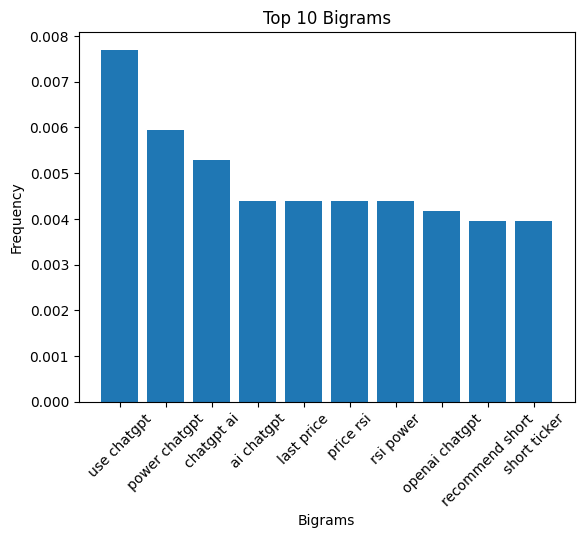

In [64]:
perform_bigram_analysis(special_chars_removed_df)

In [65]:
def perform_trigram_analysis(df):
    tokens = nltk.word_tokenize(' '.join(df['text']))
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_words(filtered_tokens)
    trigram_scores = finder.score_ngrams(trigram_measures.raw_freq)
    top_10_trigrams = trigram_scores[:10]

    x_labels = [' '.join(trigram) for trigram, _ in top_10_trigrams]
    y_values = [score for _, score in top_10_trigrams]

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=45)
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.title('Top 10 Trigrams')
    plt.show()

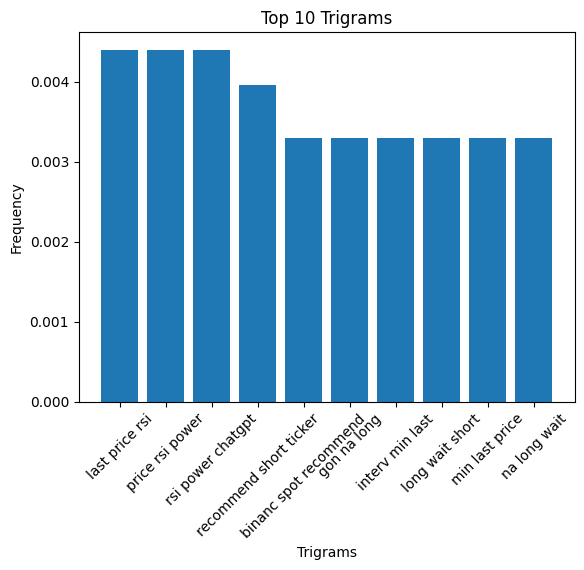

In [66]:
perform_trigram_analysis(special_chars_removed_df)

In [60]:
def generate_word_cloud(df):
    # Concatenate all text
    all_text = ' '.join(df['text'])

    # Generate word cloud
    wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(all_text)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

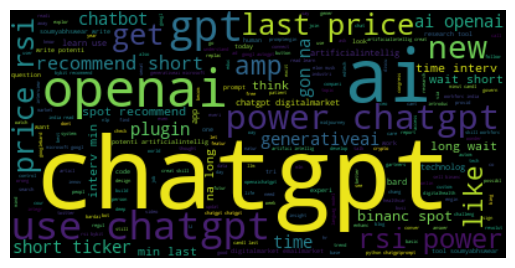

In [61]:
generate_word_cloud(stopwords_removed_df)

In [ ]:
# Sentiment Analysis

In [80]:
from textblob import TextBlob

In [81]:
def add_textblob_sentiment(df):
    df['sentiment_textblob'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else None)
    return df

In [82]:
df_with_textblob_sentiment = add_textblob_sentiment(df)

In [83]:
df_with_textblob_sentiment

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment_textblob
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.433333
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN,0.000000
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,0.000000
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,0.068182
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412806,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659,False,2022-12-05 17:10:31+00:00,NaN,Twitter for Android,0.375000
3412807,Green,Iterating back-and-forth with tools like #Chat...,🍁,NaN,2022-12-03 12:49:13+00:00,3.0,33.0,3,False,2022-12-05 17:09:22+00:00,['ChatGPT'],Twitter Web App,-0.133333
3412808,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it tak...,NaN,Mathematician and Developer @Amazon. Previousl...,2016-07-09 21:08:52+00:00,80.0,34.0,169,False,2022-12-05 17:09:04+00:00,['ChatGPT'],Twitter for Android,0.100000
3412809,Devang,Was just wondering is there any difference bet...,United States,"passionate by nature, software developer by pr...",2015-05-19 03:17:06+00:00,15.0,86.0,307,False,2022-12-05 17:08:44+00:00,"['ChatGPT', 'GPT3']",Twitter for Android,0.000000


In [90]:
from transformers import pipeline

def add_roberta_sentiment(df):
    classifier = pipeline('sentiment-analysis', model='roberta-base')
    text_list = [str(text) for text in df['text'].fillna('')]
    results = classifier(text_list)
    df['sentiment_roberta'] = [res['label'] for res in results]
    return df

In [86]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.1 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for xformers: filename=xformers-0.0.16-cp39-cp39-macosx_11_0_arm64.whl size=413986 sha256=b15b10dcc4430f447177bf3d42c9d6b2f7c76ec0f67fecefcc47c574442e7c68
  Stored in directory: /Users/student/Library/Caches/pip/wheels/b8/55/af/383791870d1426ea2f0304d603525c1262a0301358b0ba052a
Successfully built xformers


In [91]:
df_with_roberta_sentiment = add_roberta_sentiment(df_with_textblob_sentiment)  



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

KeyboardInterrupt: 

In [ ]:
def compare_sentiments(df):
    df['final_sentiment'] = df.apply(lambda row: row['sentiment_roberta']
                                     if row['sentiment_textblob'] != row['sentiment_roberta']
                                     else row['sentiment_textblob'], axis=1)
    return df

In [ ]:
def create_final_label(df):
    sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
    df['final_label'] = df['final_sentiment'].map(sentiment_mapping)
    return df

In [ ]:
df_with_roberta_sentiment = add_roberta_sentiment(df_with_textblob_sentiment)

In [ ]:
df_with_compared_sentiments = compare_sentiments(df_with_roberta_sentiment)

In [ ]:
df_with_final_label = create_final_label(df_with_compared_sentiments)

In [ ]:
# Feature Engineering

In [43]:
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [44]:
def calculate_dataset_length(df):
    dataset_length = len(df)
    return dataset_length

In [45]:
dataset_length = calculate_dataset_length(df)
print("Dataset Length:", dataset_length)

Dataset Length: 3412811


In [33]:
from nltk.tokenize import word_tokenize

def count_words(text):
    if isinstance(text, str):
        word_tokens = word_tokenize(text)
        num_words = len(word_tokens)
        return num_words
    else:
        return 0

In [34]:
df['num_words'] = df['text'].apply(count_words)
print(df['num_words'])

0      59
1       2
2      22
3      57
4      55
       ..
495    46
496    53
497    50
498    37
499    59
Name: num_words, Length: 500, dtype: int64


In [117]:
def count_spaces(text):
    if isinstance(text, str):
        num_spaces = text.count(' ')
        return num_spaces
    else:
        return 0

In [118]:
df['num_spaces'] = df['text'].apply(count_spaces)
print(df['num_spaces'])

0          45
1           1
2          16
3          38
4          38
           ..
3412806    17
3412807    29
3412808    14
3412809    14
3412810    32
Name: num_spaces, Length: 3412811, dtype: int64


In [119]:
def count_characters(text):
    if isinstance(text, str):
        num_characters = len(text)
        return num_characters
    else:
        return 0

In [120]:
df['num_characters'] = df['text'].apply(count_characters)
print(df['num_characters'])

0          277
1           13
2          119
3          282
4          261
          ... 
3412806    143
3412807    210
3412808    103
3412809     92
3412810    223
Name: num_characters, Length: 3412811, dtype: int64


In [123]:
def count_verbs(text):
    if isinstance(text, str):
        tagged_words = pos_tag(word_tokenize(text))
        verbs = [word for word, tag in tagged_words if tag.startswith('VB')]
        num_verbs = len(verbs)
        return num_verbs
    else:
        return 0

In [124]:
df['num_verbs'] = df['text'].apply(count_verbs)
print(df['num_verbs'])

0          6
1          0
2          1
3          3
4          6
          ..
3412806    0
3412807    6
3412808    3
3412809    1
3412810    6
Name: num_verbs, Length: 3412811, dtype: int64


In [130]:
def count_words_starting_with_h(text):
    words_starting_with_h = re.findall(r'\bH\w+', text, flags=re.IGNORECASE)
    num_words_starting_with_h = len(words_starting_with_h)
    return num_words_starting_with_h

In [131]:
df['num_words_starting_with_h'] = df['text'].apply(count_words_starting_with_h)
print(df['num_words_starting_with_h'])

2          1
3          1
4          1
5          2
6          2
          ..
3412806    2
3412807    4
3412808    1
3412809    0
3412810    1
Name: num_words_starting_with_h, Length: 484627, dtype: int64


/var/folders/fp/z4_9dnh14nq03ck7022x8bhr0000gn/T/ipykernel_1090/3462122667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words_starting_with_h'] = df['text'].apply(count_words_starting_with_h)


In [132]:
def count_exclamation_marks(text):
    num_exclamation_marks = text.count('!')
    return num_exclamation_marks

In [133]:
df['num_exclamation_marks'] = df['text'].apply(count_exclamation_marks)
print(df['num_exclamation_marks'])

2          0
3          0
4          1
5          0
6          0
          ..
3412806    0
3412807    0
3412808    0
3412809    0
3412810    0
Name: num_exclamation_marks, Length: 484627, dtype: int64


/var/folders/fp/z4_9dnh14nq03ck7022x8bhr0000gn/T/ipykernel_1090/596291456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_exclamation_marks'] = df['text'].apply(count_exclamation_marks)


In [3]:
# Vectorization

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

In [98]:
count_vectorizer = CountVectorizer()
count_vectorized_data = count_vectorizer.fit_transform(df['text'].fillna(''))
CountVect_df = pd.DataFrame(count_vectorized_data.toarray(), columns=count_vectorizer.get_feature_names())
#print(CountVect_df)
CountVect_df

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00334,00618,0062,00vx4yfo6y,01635,0197,02,0334,05,...,シェイクペイ,デジバイト,バイビット,바이비트,비트코인,알파,어드벤처골드,이캐시,저스트,코스모스
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorized_data = tfidf_vectorized_data.fit_transform(df['text'].fillna(''))
TfIDF_df = pd.DataFrame(tfidf_vectorized_data.toarray(), columns=tfidf_vectorizer.get_feature_names())
#print(TfIDF_df)
TfIDF_df

AttributeError: fit_transform not found

In [58]:
import numpy as np

In [61]:
word2vec_model = Word2Vec(df['text'].fillna('').apply(lambda x: x.split()), min_count=1)
word2vec_embeddings = df['text'].fillna('').apply(lambda x: np.mean([word2vec_model.wv[word] for word in x.split()], axis=0))
W2V_df = pd.DataFrame(word2vec_embeddings.tolist())
#print(W2V_df)
W2V_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.004933,0.010622,0.000974,0.001270,0.001936,-0.013134,0.004369,0.019215,-0.006678,-0.005708,...,0.010261,0.003030,0.004549,-0.001731,0.013873,0.004743,0.004035,-0.006445,0.004098,-0.000554
1,-0.005062,0.007757,0.006287,0.003435,0.001471,-0.008956,0.002882,0.020493,-0.010049,-0.006121,...,0.005475,0.007660,-0.002854,-0.003637,0.008034,0.012191,0.006285,-0.005109,0.006779,0.008176
2,-0.000788,0.005235,0.000821,-0.000764,0.003505,-0.007217,0.003747,0.008497,-0.003850,-0.005250,...,0.005122,0.001906,0.002235,0.000473,0.004963,0.003602,0.002436,-0.003414,-0.001289,0.002143
3,-0.004377,0.009124,0.000163,0.000364,0.000899,-0.008756,0.004554,0.013528,-0.004743,-0.005504,...,0.006158,0.001505,0.003603,0.000353,0.010122,0.002385,0.003145,-0.004570,0.001058,0.000645
4,-0.003411,0.009967,0.001870,-0.000736,0.002325,-0.007564,0.002697,0.012328,-0.003880,-0.004836,...,0.007772,0.001693,-0.000122,0.000507,0.008728,0.004276,0.000534,-0.005249,0.002373,0.000530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.004149,0.008946,0.000143,0.002536,0.001213,-0.010328,0.003935,0.014169,-0.004700,-0.005154,...,0.005584,0.002011,0.003435,0.000189,0.009614,0.002217,0.000345,-0.003711,0.002310,0.001015
496,-0.005078,0.008932,0.001561,0.002114,0.002967,-0.012257,0.004057,0.018360,-0.004516,-0.007353,...,0.008722,0.002426,0.005171,0.000107,0.013683,0.003543,0.002805,-0.004511,0.000853,0.002919
497,-0.001542,0.006648,0.000409,0.001110,0.002469,-0.006102,0.004168,0.010516,-0.005399,-0.002198,...,0.004075,0.000766,0.002940,-0.000183,0.006070,0.002488,0.002319,-0.004044,0.002449,0.002251
498,-0.009111,0.013926,0.001623,0.003626,0.002596,-0.016061,0.007699,0.023333,-0.008724,-0.007925,...,0.009952,0.002512,0.004057,-0.002097,0.017880,0.004005,0.004721,-0.008398,0.002525,0.000166


In [60]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,num_words
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN,2
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,22
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,57
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,46
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.,53
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,50
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk,37


In [ ]:
# Feature selection

In [53]:
import seaborn as sns

In [54]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()
best_corr_feature = correlation_matrix['label'].abs().idxmax()
corr_df = df[[best_corr_feature, 'label']].copy()
sns.barplot(data=corr_df, x='label', y=best_corr_feature)

KeyError: 'label'

In [48]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()
best_corr_feature = correlation_matrix['label'].abs().idxmax()
corr_df = df[[best_corr_feature, 'label']].copy()
sns.barplot(data=corr_df, x='label', y=best_corr_feature)

KeyError: 'label'

In [55]:
correlation_matrix = df.drop(['text', 'CountVect_df', 'TfIDF_df', 'W2V_df'], axis=1).corr()
best_corr_feature = correlation_matrix['label'].abs().idxmax()
corr_df = df[[best_corr_feature, 'label']].copy()
sns.barplot(data=corr_df, x='label', y=best_corr_feature)

KeyError: "['CountVect_df', 'TfIDF_df', 'W2V_df'] not found in axis"

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
info_gains = mutual_info_classif(df.drop(['text', 'CountVect_df', 'TfIDF_df', 'W2V_df'], axis=1), df['label'])
best_info_feature = df.drop(['text', 'CountVect_df', 'TfIDF_df', 'W2V_df'], axis=1).columns[np.argmax(info_gains)]
info_df = df[[best_info_feature, 'label']].copy()
sns.barplot(data=info_df, x='label', y=best_info_feature)

In [ ]:
print("Selected Feature based on Correlation:", best_corr_feature)
print("Selected Feature based on Information Gain:", best_info_feature)

In [ ]:
corr_feature_stats = df[[best_corr_feature, 'label']].describe()
info_feature_stats = df[[best_info_feature, 'label']].describe()

In [ ]:
print("\nSummary Statistics of the Selected Features based on Correlation:")
print(corr_feature_stats)

In [ ]:
print("\nSummary Statistics of the Selected Features based on Information Gain:")
print(info_feature_stats)

In [ ]:
# preparing set of data and models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'RNN': YourRNNModel()  # Replace YourRNNModel with your actual RNN model
}

In [ ]:
combinations = [
    (CountVect_df, corr_df),
    (TfIDF_df, corr_df),
    (W2V_df, corr_df),
    (CountVect_df, info_df),
    (TfIDF_df, info_df),
    (W2V_df, info_df)
]

In [ ]:
accuracy_list = []
precision_list = []

In [ ]:
for i, (data, features) in enumerate(combinations):
    X = data.merge(features, left_index=True, right_index=True)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy_list.append((i+1, model_name, accuracy))
        precision_list.append((i+1, model_name, precision))

In [ ]:
accuracy_df = pd.DataFrame(accuracy_list, columns=['Set', 'Model', 'Accuracy'])
precision_df = pd.DataFrame(precision_list, columns=['Set', 'Model', 'Precision'])

In [ ]:
plt.figure(figsize=(10, 6))
accuracy_df.pivot(index='Set', columns='Model', values='Accuracy').plot(kind='bar', stacked=True)
plt.title('Accuracy Comparison for Different Sets and Models')
plt.xlabel('Set')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()

In [ ]:
print("Accuracy:\n", accuracy_df)
print("\nPrecision:\n", precision_df)